# Analytic and simulation results for a simple M/M/c model

## Importing modules

In [1]:
# Plotting modules
import matplotlib.pyplot as plt
import matplotlib.ticker as formater

# Simulation
from queuesim.models import mmc_model, mmc_results, get_simulator_from_model

# Analytic calculation
from queuesim.analytic import erlang_c

# Defining general plot style
plt.style.use('seaborn-v0_8')

## Model parameters

In [2]:
# Mean inter-arrival time
mean_i = 100

# Mean service time
mean_s = 800

# Number of operators
c = 10

# Number of arrivals to be simulated
count = 100_000

## Simulation

In [3]:
# Build model
model = mmc_model(mean_i, mean_s, c, count)

# Run simulation
simulator = get_simulator_from_model(model)
%time simulator.run()

# Show results
print(mmc_results(model))

CPU times: total: 2.22 s
Wall time: 2.23 s
System
  Simulated arrivals: 100000
  Inter-arrival times at the system (I): mean = 99.4, sd = 98.9, cv = 1.0
  Inter-departure times from the system (ID): mean = 99.5, sd = 99.2, cv = 1.0

Process station
  Waiting times (W): mean = 166.6, sd = 334.9, cv = 2.0
  Service times (S): mean = 797.1, sd = 796.0, cv = 1.0
  Queue length (NQ): mean = 1.7
  Clients at the station (N): mean = 9.7
  Work load (rho*c): mean = 8.0

Clients
  Waiting times (W): mean = 166.6, sd = 334.9, cv = 2.0
  Service times (S): mean = 797.1, sd = 796.0, cv = 1.0
  Residence times (V): mean = 963.7, sd = 864.1, cv = 0.9


## Analytic results (Erlang C)

In [4]:
analytic = erlang_c(1 / mean_i, 1 / mean_s, c)
print("E[N_Q]=", round(analytic.ENQ, 2), sep="")
print("E[N]=", round(analytic.EN, 2), sep="")
print("E[W]=", round(analytic.EW, 2), sep="")
print("E[V]=", round(analytic.EV, 2), sep="")
print("rho=", round(analytic.rho * 100, 2), "%", sep="")

E[N_Q]=1.64
E[N]=9.64
E[W]=163.67
E[V]=963.67
rho=80.0%


## Frequency distribution of the waiting times of the clients

In [5]:
# Optional: Interactive diagram mode
# Run "pip install ipympl" first
# %matplotlib ipympl

Text(0.5, 1.0, 'Frequency distribution of the waiting times of the clients')

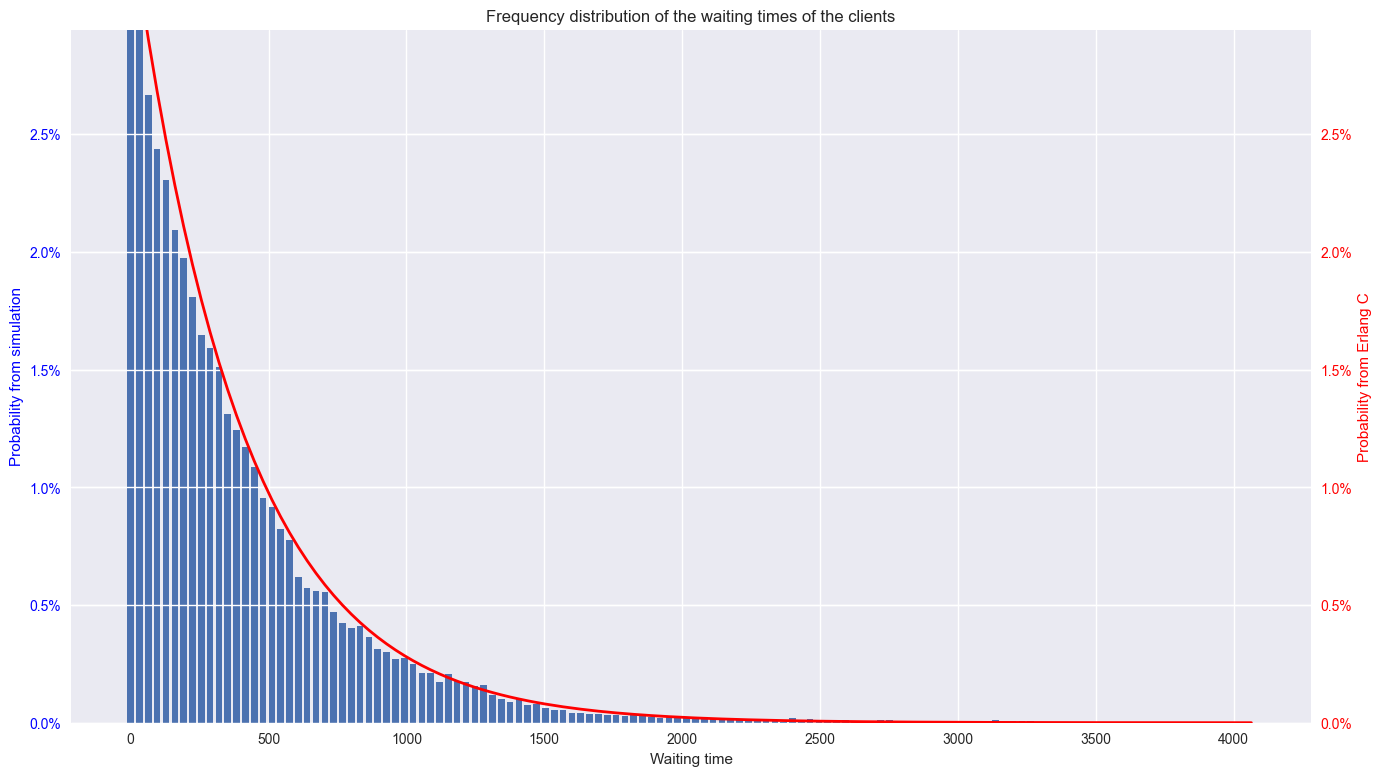

In [6]:
# Get frequency distribution of the waiting times
stat = model['Dispose'].statistic_client_waiting

# Build histogram values
hist_y_sum = sum(stat.histogram)
hist_y = stat.histogram
hist_x = [i * stat.histogram_stepwide for i in range(len(hist_y))]

# Build P(W=t) by Erlang C formula
erlang_hist_x = range(0, len(stat.histogram) * stat.histogram_stepwide, stat.histogram_stepwide)
erlang_hist_y = []
last = 0
for t in erlang_hist_x:
    value = analytic.Pt(t)
    erlang_hist_y.append(value - last)
    last = value

# Show histogram
_, ax = plt.subplots(figsize=(16, 9))
ax.bar(hist_x, hist_y, width=stat.histogram_stepwide * 0.75)
ax.set_ylim(0, max(hist_y[1:]))
ax.yaxis.set_major_formatter(formater.PercentFormatter(xmax=hist_y_sum, decimals=1))
ax.tick_params(axis='y', labelcolor='b')
ax.set_ylabel("Probability from simulation", color='b')
ax.set_xlabel("Waiting time")

ax = ax.twinx()
ax.plot(erlang_hist_x, erlang_hist_y, 'r', linewidth=2)
ax.set_ylim(0, hist_y[1] / hist_y_sum)
ax.yaxis.set_major_formatter(formater.PercentFormatter(xmax=1, decimals=1))
ax.tick_params(axis='y', labelcolor='r')
ax.set_ylabel("Probability from Erlang C", color='r')

ax.set_title("Frequency distribution of the waiting times of the clients")